In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("cardekho_data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.duplicated().sum()

np.int64(2)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

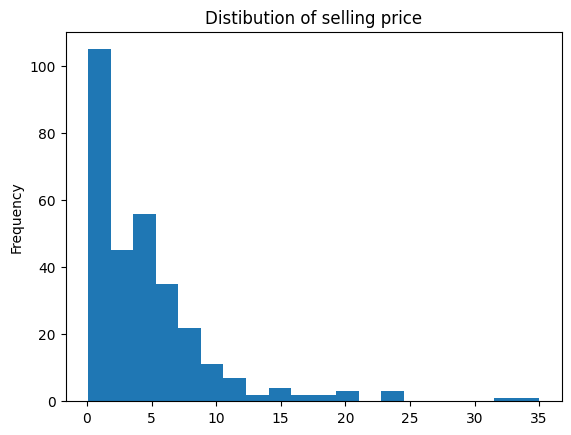

In [12]:
df["Selling_Price"].plot(kind="hist" , bins=20,title="Distibution of selling price")
plt.show()

In [13]:
fuel_type_average_price=df.groupby("Fuel_Type")["Selling_Price"].mean()
fuel_type_average_price

Fuel_Type
CNG        3.100000
Diesel    10.102759
Petrol     3.264184
Name: Selling_Price, dtype: float64

In [14]:
fuel_type_average_price.reset_index()

,Fuel_Type,Selling_Price
0,CNG,3.100000
1,Diesel,10.102759
2,Petrol,3.264184


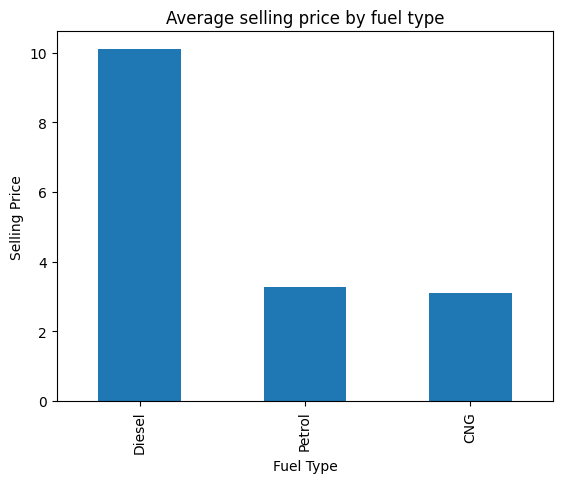

In [15]:
fuel_type_average_price.sort_values(ascending=False).plot(kind="bar" ,xlabel="Fuel Type" ,ylabel="Selling Price",title="Average selling price by fuel type")
plt.show()


In [16]:
transmission_counts=df["Transmission"].value_counts()
transmission_counts

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

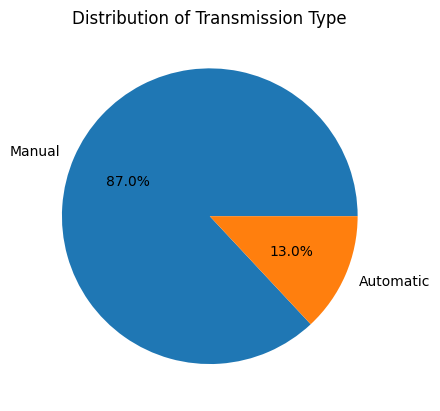

In [17]:
transmission_counts.plot(kind="pie" ,ylabel="",autopct="%1.1f%%",title="Distribution of Transmission Type")
plt.show()

In [18]:
yearly_average_km_driven=df.groupby("Year")["Kms_Driven"].mean()

In [19]:
yearly_average_km_driven.sort_values(ascending=False)

Year
2004    135154.000000
2008    112128.571429
2005    104294.000000
2003     94500.000000
2006     87422.250000
2009     67820.500000
2010     60014.066667
2007     51000.000000
2012     43798.217391
2013     41534.333333
2011     40327.368421
2014     38080.315789
2015     31977.683333
2016     17885.040816
2017     10419.800000
2018      2071.000000
Name: Kms_Driven, dtype: float64

In [20]:
fuel_trans_max_sellingprice=df.groupby(["Fuel_Type","Transmission"])["Selling_Price"].max()

In [21]:
fuel_trans_max_sellingprice.reset_index()

,Fuel_Type,Transmission,Selling_Price
0,CNG,Manual,3.25
1,Diesel,Automatic,33.00
2,Diesel,Manual,35.00
3,Petrol,Automatic,19.75
4,Petrol,Manual,17.00


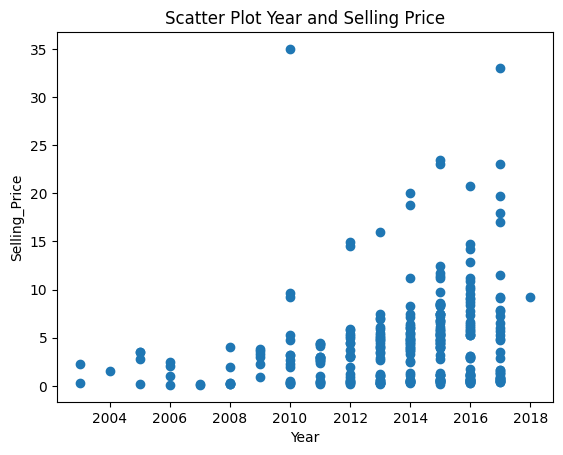

In [22]:
plt.scatter(df["Year"],df["Selling_Price"])
plt.title('Scatter Plot Year and Selling Price')
plt.xlabel("Year")
plt.ylabel("Selling_Price")
plt.show()

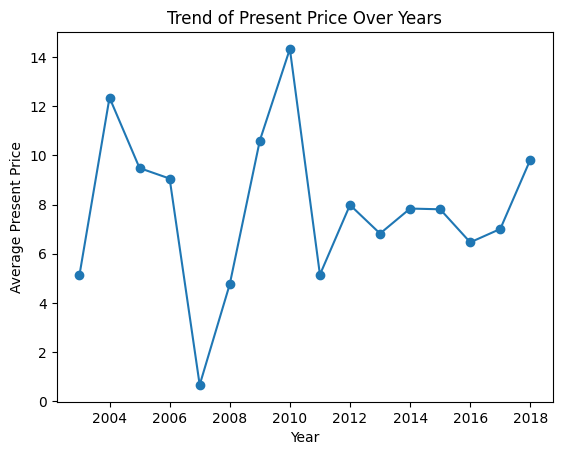

In [23]:
plt.plot(df.groupby("Year")["Present_Price"].mean(),marker="o")
plt.title("Trend of Present Price Over Years")
plt.xlabel("Year")
plt.ylabel("Average Present Price")
plt.show()

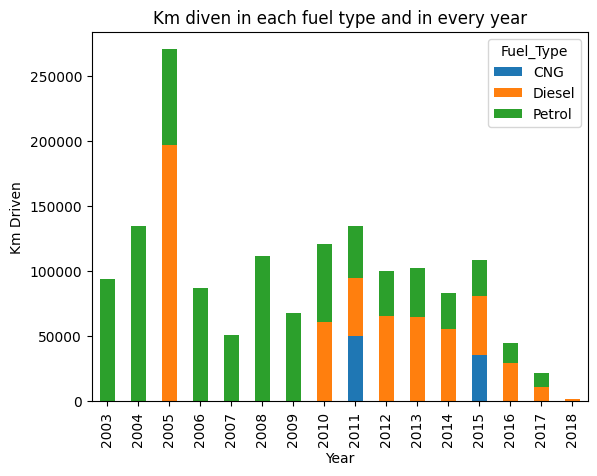

In [24]:
df.groupby(["Year" ,"Fuel_Type"])["Kms_Driven"].mean().unstack().plot(kind="bar" ,stacked=True)
plt.ylabel("Km Driven")
plt.title("Km diven in each fuel type and in every year")
plt.show()

In [25]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
y=df["Selling_Price"]

In [27]:
X=df[["Year","Kms_Driven","Fuel_Type","Transmission","Owner"]]

In [28]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,Petrol,Manual,0
1,2013,43000,Diesel,Manual,0
2,2017,6900,Petrol,Manual,0
3,2011,5200,Petrol,Manual,0
4,2014,42450,Diesel,Manual,0
...,...,...,...,...,...
296,2016,33988,Diesel,Manual,0
297,2015,60000,Petrol,Manual,0
298,2009,87934,Petrol,Manual,0
299,2017,9000,Diesel,Manual,0


In [29]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

In [30]:
X["Fuel_Type"]=labelencoder.fit_transform(X["Fuel_Type"])
X["Transmission"]=labelencoder.fit_transform(X["Transmission"])

C:\Users\acer\AppData\Local\Temp\ipykernel_25624\1548648211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Fuel_Type"]=labelencoder.fit_transform(X["Fuel_Type"])
C:\Users\acer\AppData\Local\Temp\ipykernel_25624\1548648211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Transmission"]=labelencoder.fit_transform(X["Transmission"])


In [32]:
X.head(50)

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,2,1,0
1,2013,43000,1,1,0
2,2017,6900,2,1,0
3,2011,5200,2,1,0
4,2014,42450,1,1,0
5,2018,2071,1,1,0
6,2015,18796,2,1,0
7,2015,33429,1,1,0
8,2016,20273,1,1,0
9,2015,42367,1,1,0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [60]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np


In [36]:
def modelresults(predictions):
    print("Mean absolute error is {}".format(mean_absolute_error(y_test,predictions)))
    print("Root mean squared error is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))
    

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(scaled_X_train,y_train)

LinearRegression()

In [41]:
predslr=lr.predict(scaled_X_test)

In [42]:
modelresults(predslr)

Mean absolute error is 2.8272355021289517
Root mean squared error is 3.863868070106274


In [43]:
from sklearn.svm import SVR

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
svrmodel=SVR()

In [46]:
param_gridsvr={"C":[0.1,0.5],
               "kernel":["linear" ,"rbf" ,"poly"],
               "degree":[2,3,4]}

In [47]:
gridsvr=GridSearchCV(svrmodel,param_gridsvr)

In [48]:
gridsvr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [49]:
gridsvr.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'linear'}

In [50]:
predsgridsvr=gridsvr.predict(scaled_X_test)

In [51]:
modelresults(predsgridsvr)

Mean absolute error is 2.851622116237957
Root mean squared error is 4.083909155558523


In [52]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfrmodel=RandomForestRegressor()
params_gridrfr={"max_depth":[5,10],
                "n_estimators":[2,5,8]}
gridrfr=GridSearchCV(rfrmodel,params_gridrfr)

In [55]:
gridrfr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [2, 5, 8]})

In [56]:
predsgridrfr=gridrfr.predict(scaled_X_test)

In [58]:
modelresults(predsgridrfr)

Mean absolute error is 2.5389963501458594
Root mean squared error is 3.7399841450880444


In [59]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [61]:
X.columns

Index(['Year', 'Kms_Driven', 'Fuel_Type', 'Transmission', 'Owner'], dtype='object')

In [95]:
X.head(50)

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,2,1,0
1,2013,43000,1,1,0
2,2017,6900,2,1,0
3,2011,5200,2,1,0
4,2014,42450,1,1,0
5,2018,2071,1,1,0
6,2015,18796,2,1,0
7,2015,33429,1,1,0
8,2016,20273,1,1,0
9,2015,42367,1,1,0


In [62]:
best_model=RandomForestRegressor()

In [64]:
best_model.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
joblib.dump(best_model,"model.pkl")

['model.pkl']